Focal length= 92.94941600510872 +/- 3.2428220804091867 mm


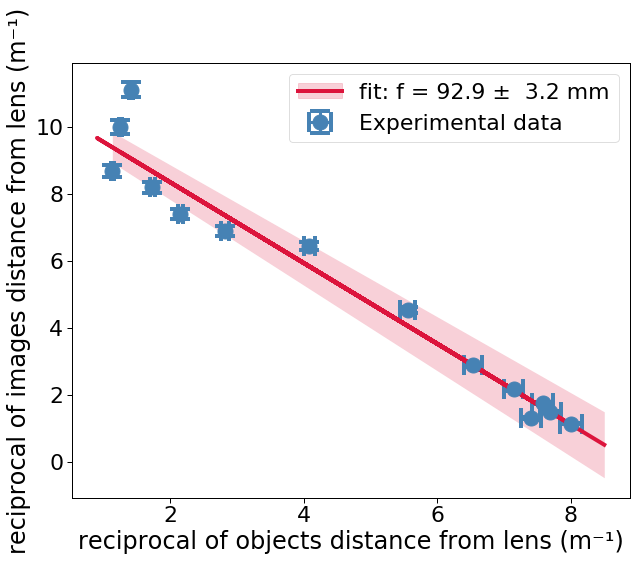

In [59]:
import numpy as np
from scipy.odr import *


s=[18,24.5,15.3,35.5,14,46.5,13.2,57.8,13,71,13.5,80,12.5,88.5]
s_= [22,15.5,34.7,14.5,46,13.5,56.8,12.2,67,9,76.5,10,87.5,11.5]



sr=[]
s_r=[]
for i in s:
    sr.append(1/(i*10**-2))
for i in s_:
    s_r.append(1/(i*10**-2))

import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
sns.set_context('paper', font_scale=2.5)
plt.figure(figsize=(10,8))
def lin_func(p, x):
    a, b = p
    return a*x+b
lin_model = Model(lin_func)

# Create a RealData object using our initiated data from above.
data = RealData(sr, s_r, sx=0.02*np.array(sr), sy=0.02*np.array(s_r))

# Set up ODR with the model and data.
odr = ODR(data, lin_model, beta0=[1., 1.])
out = odr.run()

p1 = plt.errorbar(sr, s_r, xerr=0.02*np.array(sr), yerr=0.02*np.array(s_r), linestyle = 'None', fmt='-o',
             capsize=10, elinewidth=3, capthick=4, markersize=15, color='steelblue', label="Experimental data")
plt.xlabel("reciprocal of objects distance from lens (m⁻¹)")
plt.ylabel("reciprocal of images distance from lens (m⁻¹)")
p2 = plt.plot(np.append(sr, [0.9,8.5]), lin_func(out.beta, np.append(sr, [0.9,8.5])),color='crimson',
             label='fit: f=%5.1f ± %5.1f' % ((1/out.beta[1])*1000, out.sd_beta[1]*(1/out.beta[1])*1000/out.beta[1]), lw=4)
p3 = plt.fill(np.NaN, np.NaN, color='crimson', alpha = 0.2)
plt.fill_between(sr, 
                 lin_func(out.beta-out.sd_beta, np.array(sr)),
                 lin_func(out.beta+out.sd_beta, np.array(sr)),
                 color='crimson', alpha=0.2, interpolate=True, lw=0)
plt.fill_between(np.append(sr, [0.9,8.5]), 
                 lin_func(out.beta-out.sd_beta, np.append(sr, [0.9,8.5])),
                 lin_func(out.beta+out.sd_beta, np.append(sr, [0.9,8.5])),
                 color='crimson', alpha=0.2, interpolate=True, lw=0)
print("Focal length=", (1/out.beta[1])*1000, "+/-", out.sd_beta[1]*(1/out.beta[1])*1000/out.beta[1] , "mm")
plt.legend([(p2[0], p3[0]), p1], ['fit: f =%5.1f ±%5.1f mm'% ((1/out.beta[1])*1000, out.sd_beta[1]*(1/out.beta[1])*1000/out.beta[1]),
                                  'Experimental data'])
plt.show()

In [60]:
len(s_r)

14

In [62]:
out.res_var*12

185.37153928410015